In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [51]:
data = pd.read_csv('../data/adult.csv')

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
print(data[(data["salary"] == "<=50K") & (data["salary K$"] >= 50)])
print(data[(data["salary"] == ">50K") & (data["salary K$"] < 50)])


Empty DataFrame
Columns: [Unnamed: 0, age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []


In [36]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  salary          30162 non-null  object
 12  salary K$       30162 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


,Unnamed: 0,age,hours-per-week,salary K$
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,16287.103242,38.437902,40.931238,73.968570
std,9383.401676,13.134665,11.979984,85.365144
min,0.000000,17.000000,1.000000,15.000000
25%,8178.250000,28.000000,40.000000,26.000000
50%,16285.500000,37.000000,40.000000,38.000000
75%,24401.750000,47.000000,45.000000,49.000000
max,32560.000000,90.000000,99.000000,349.000000


In [37]:
data.head(5)

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [38]:
sex_counts = data["sex"].value_counts()
print(sex_counts)

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [39]:
men_average_age = data[data["sex"] == "Male"]["age"].mean()
print(men_average_age)

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [40]:
people = sum(data["native-country"].value_counts())
people_poland = data[data["native-country"] == "Poland"].shape[0]
percent = (people_poland / people) * 100
print(percent)

0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [41]:
high = data[data['salary'] == '>50K']
low = data[data['salary'] == '<=50K']

print(high['age'].mean())
print(high['age'].std())

print(low['age'].mean())
print(low['age'].std())

43.95911028236548
10.269632835673852
36.60806038668668
13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [42]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
data[(data["salary"] == ">50K") & (~data["education"].isin(higher_education))]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [43]:
data.groupby(data["education"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

<Axes: title={'center': 'Salary of Married Men'}, ylabel='count'>

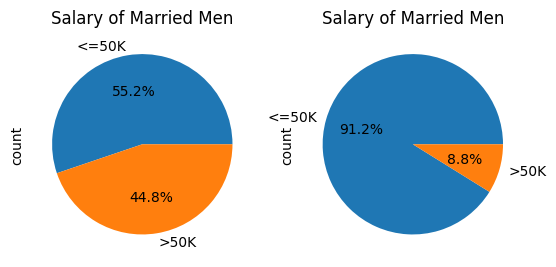

In [44]:
married = data[
    (data["sex"] == "Male") & (data["marital-status"].str.startswith("Married"))]["salary"].value_counts()
non_maried = data[
    (data["sex"] == "Male") & (~data["marital-status"].str.startswith("Married"))]["salary"].value_counts()

plt.subplot(1, 2, 1)
plt.title("Salary of Married Men")
married.plot.pie(autopct="%1.1f%%")

plt.subplot(1, 2, 2)
plt.title("Salary of Married Men")
non_maried.plot.pie(autopct="%1.1f%%")


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [45]:
max_hours = data["hours-per-week"].max()
people = (data["hours-per-week"] == max_hours).value_counts()
print(people)

hours-per-week
False    30084
True        78
Name: count, dtype: int64


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [46]:
data.corr(numeric_only=True)

,Unnamed: 0,age,hours-per-week,salary K$
Unnamed: 0,1.000000,-0.001126,-0.001890,0.000129
age,-0.001126,1.000000,0.101599,0.208203
hours-per-week,-0.001890,0.101599,1.000000,0.196378
salary K$,0.000129,0.208203,0.196378,1.000000
